## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## First, I'll compute the camera calibration using chessboard images

In [1]:
%matplotlib inline

In [2]:
# %load utils.py
%run utils.py

In [3]:
mtx, dist = getDistort()

In [4]:
img_size = (1280,720)
src,dst,M,Minv = getPerspectiveTransform(img_size)

## Second,I apply a distortion correction to raw images.

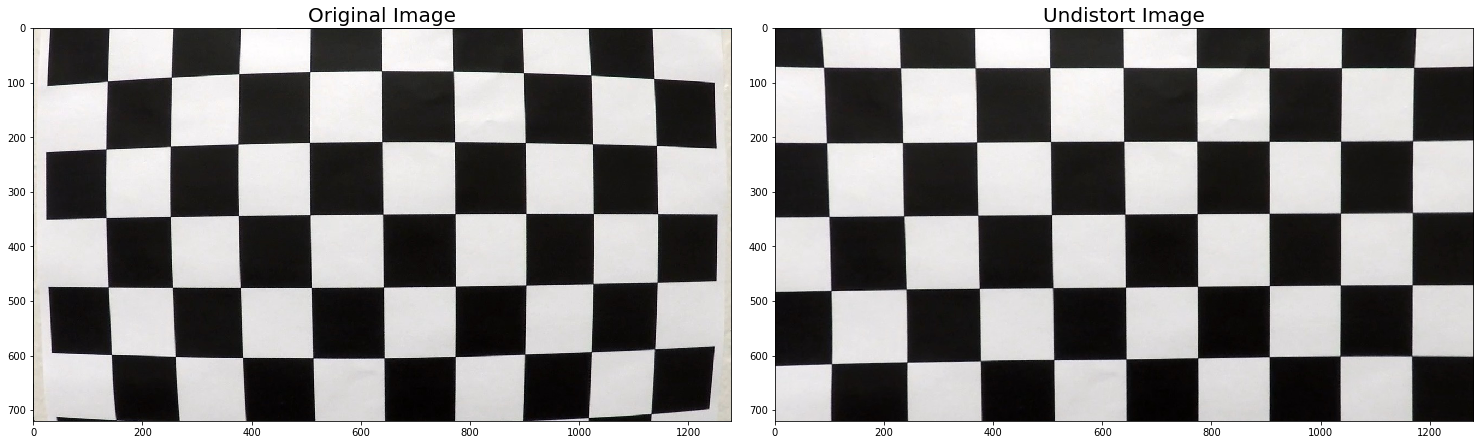

In [5]:
src_img = mpimg.imread('./camera_cal/calibration1.jpg')
dst_img = cv2.undistort(src_img, mtx, dist, None,mtx)
fname = './writeup_images/undistort_output.jpg'
show_compare(src_img,dst_img,title1="Original Image",title2="Undistort Image",save=True,filename=fname)

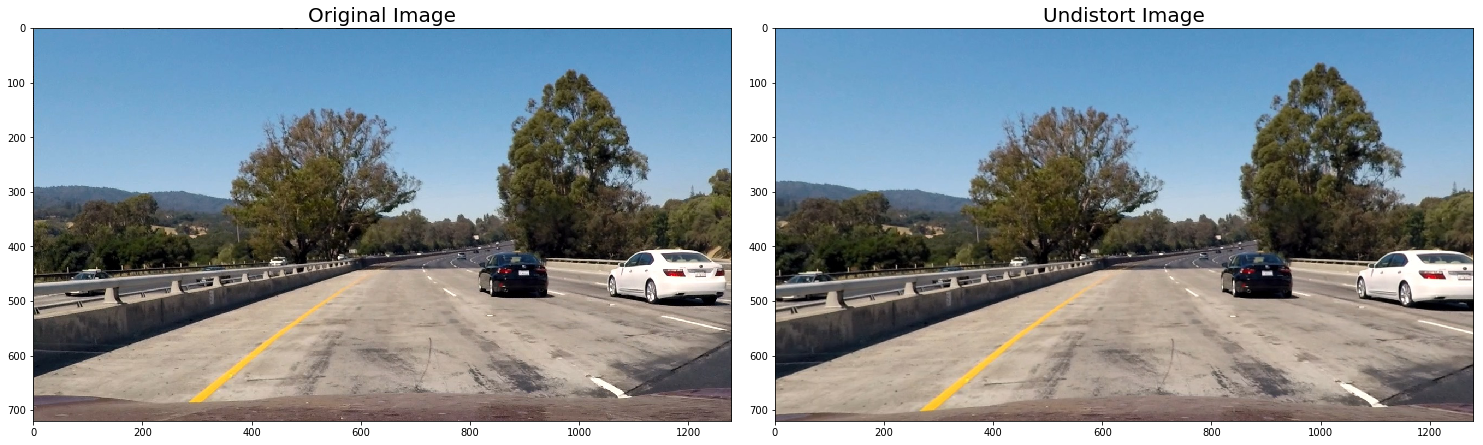

In [6]:
src_img = mpimg.imread('./test_images/test1.jpg')
dst_img = cv2.undistort(src_img, mtx, dist, None,mtx)
show_compare(src_img,dst_img,title1="Original Image",title2="Undistort Image")

In [7]:
fname = './writeup_images/undistort_test1.jpg'
mpimg.imsave(fname,dst_img)

## Third, Use color transforms, gradients, etc., to create a thresholded binary image.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


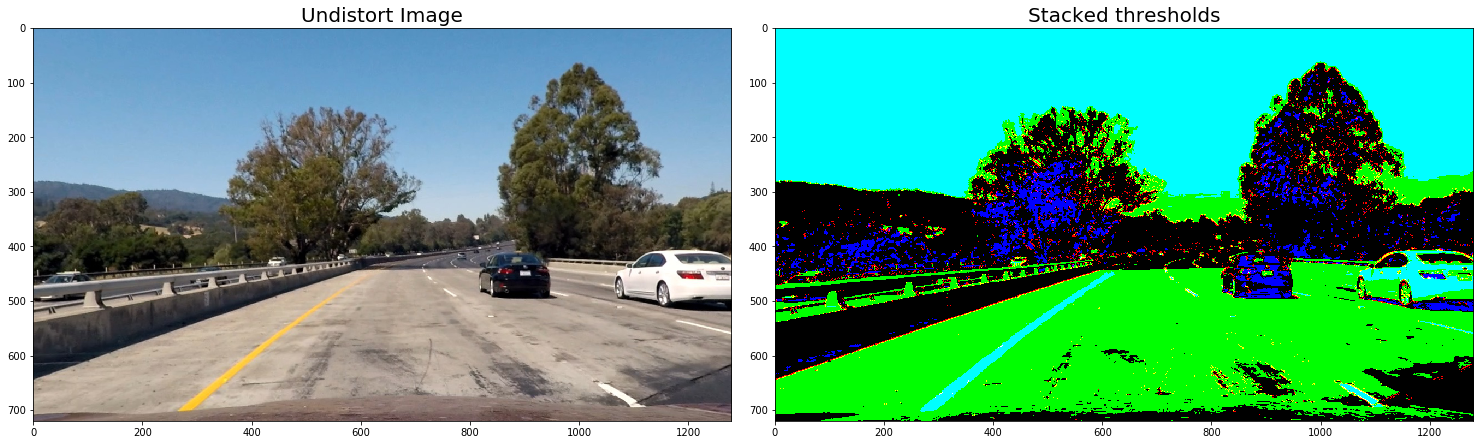

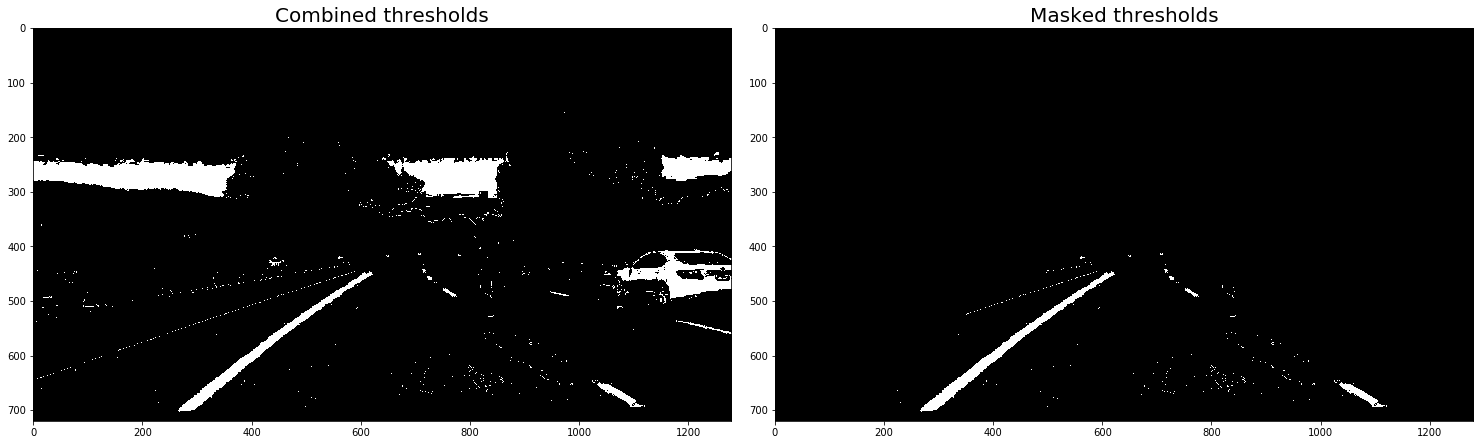

In [8]:
bin_img = threshod(dst_img,visual=True)
fname = './writeup_images/binary_combo_example.jpg'
# print(bin_img.shape)
ret = cv2.imwrite(fname,bin_img)
# plt.imshow(bin_img,cmap='gray')
# plt.savefig(fname)

## Fourth,Apply a perspective transform to rectify binary image ("birds-eye view").

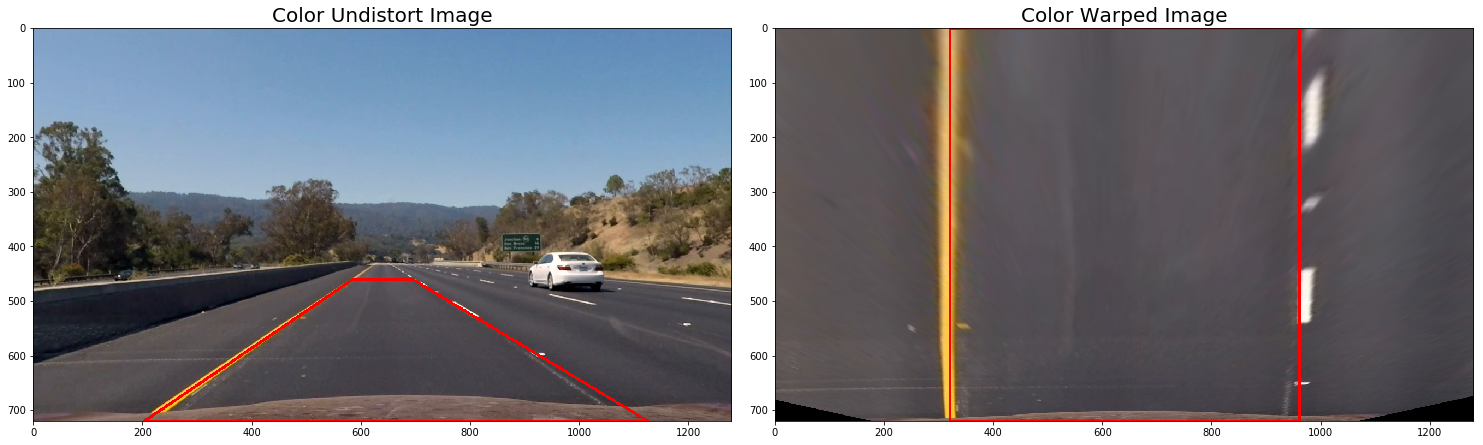

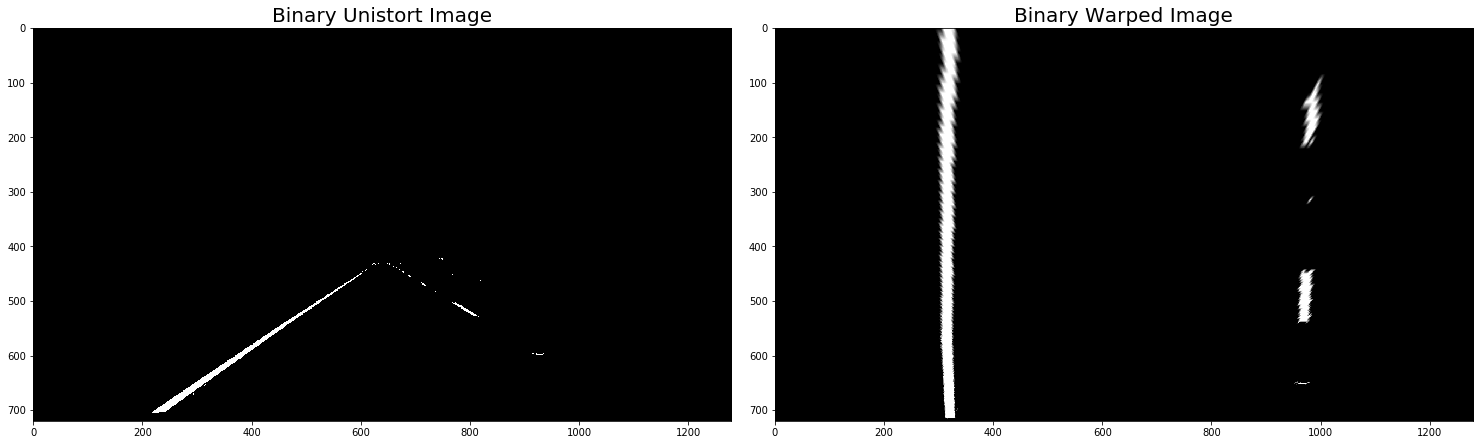

In [9]:
img = mpimg.imread('./test_images/straight_lines3.jpg')
undist,bin_img,binary_warped = warper(img,dist,mtx,src,dst,M,visual = True)

## Fifth,Detect lane pixels and fit to find the lane boundary.

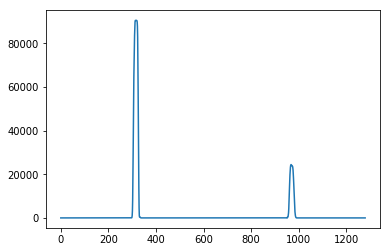

current pos: 316 968
current pos: 318 963
current pos: 315 963
current pos: 314 969
current pos: 314 972
current pos: 315 972
current pos: 314 981
current pos: 314 978
current pos: 316 986


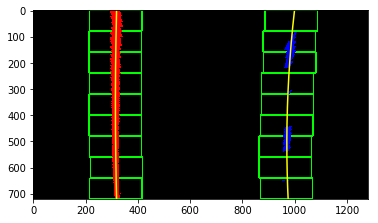

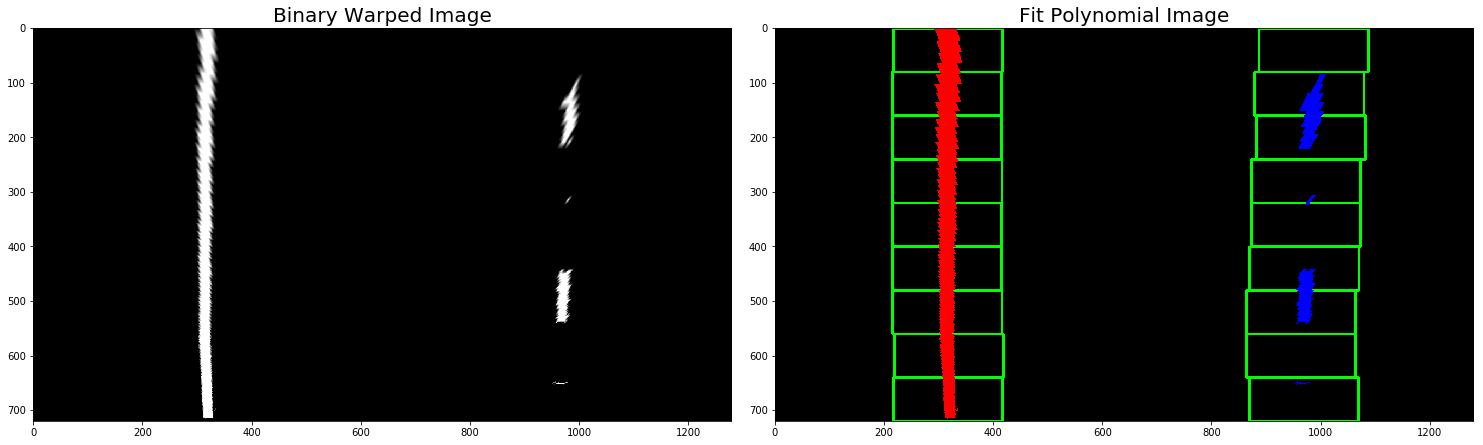

In [10]:
left_fitx, right_fitx, ploty, left_fit, right_fit, leftx, lefty, rightx, righty, out_img = fit_polynomial(binary_warped,visual=True)

## Sixth,Determine the curvature of the lane and vehicle position with respect to center.

In [11]:
left_curverad, right_curverad,vehicle_pos = measure_curvature_real(binary_warped.shape,left_fitx,right_fitx,ploty)
print(left_curverad, 'm', right_curverad, 'm', vehicle_pos, 'm')

4795.372672731127 m 1462.9419490895812 m 0.09923698143435465 m


## Seventh,Warp the detected lane boundaries back onto the original image.

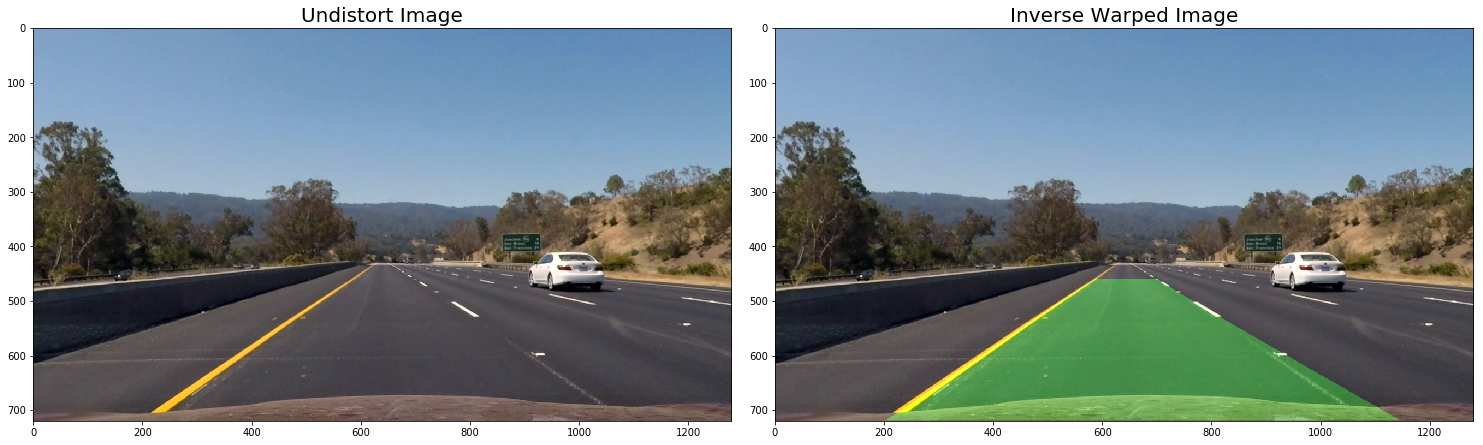

In [12]:
result = map_lane(undist,Minv,left_fitx,right_fitx,ploty,visual=True)

## Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

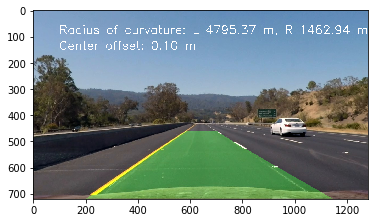

In [13]:
curvature_string = "Radius of curvature: L %.2f m, R %.2f m" % (left_curverad,right_curverad)
offset_string = "Center offset: %.2f m" % vehicle_pos

cv2.putText(result,curvature_string , (100, 90), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255,255,255), thickness=2)
cv2.putText(result, offset_string, (100, 150), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255,255,255), thickness=2)
plt.imshow(result)

fname = './writeup_images/example_output.jpg'
ret = cv2.imwrite(fname,result)


# Pipeline (image)

In [14]:
# %load utils.py
%run utils.py

<Figure size 432x288 with 0 Axes>

In [15]:
def process_image(image,dis):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image where lines are drawn on lanes)
    mtx, dist = getDistort()
    src,dst,M,Minv = getPerspectiveTransform(image.shape[1::-1])
    undist,bin_img,binary_warped = warper(img,dist,mtx,src,dst,M,visual = dis)
    left_fitx, right_fitx, ploty, left_fit, right_fit, leftx, lefty, rightx, righty, out_img = fit_polynomial(binary_warped,visual = dis)
    print('fit: ',left_fit,right_fit)
    left_curverad, right_curverad,vehicle_pos = measure_curvature_real(binary_warped.shape,left_fitx,right_fitx,ploty)
    print(left_curverad, 'm', right_curverad, 'm', vehicle_pos, 'm')
    result = map_lane(undist,Minv,left_fitx,right_fitx,ploty,visual = dis)
    return result

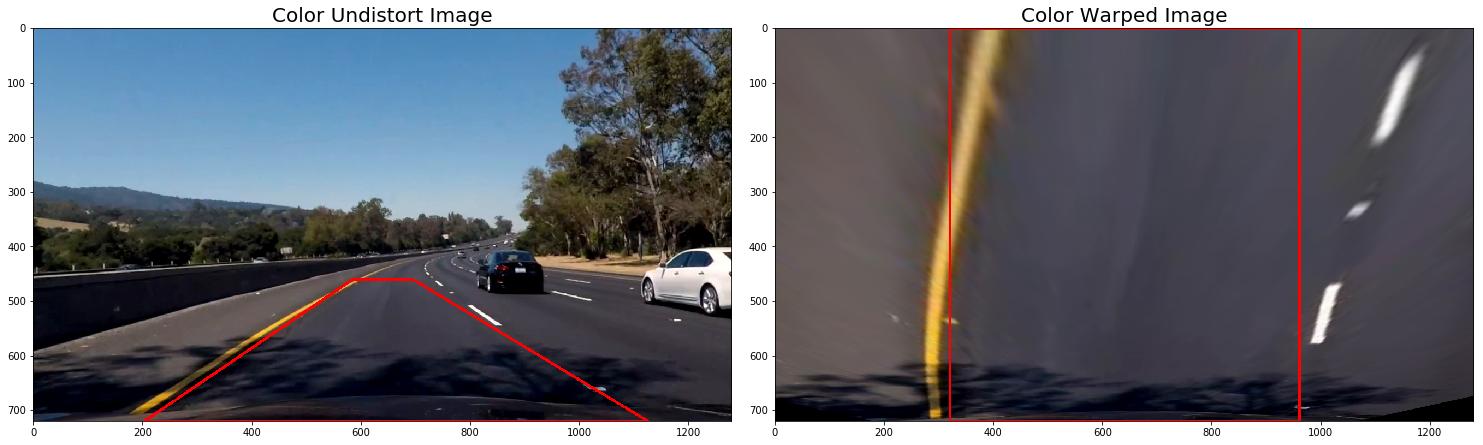

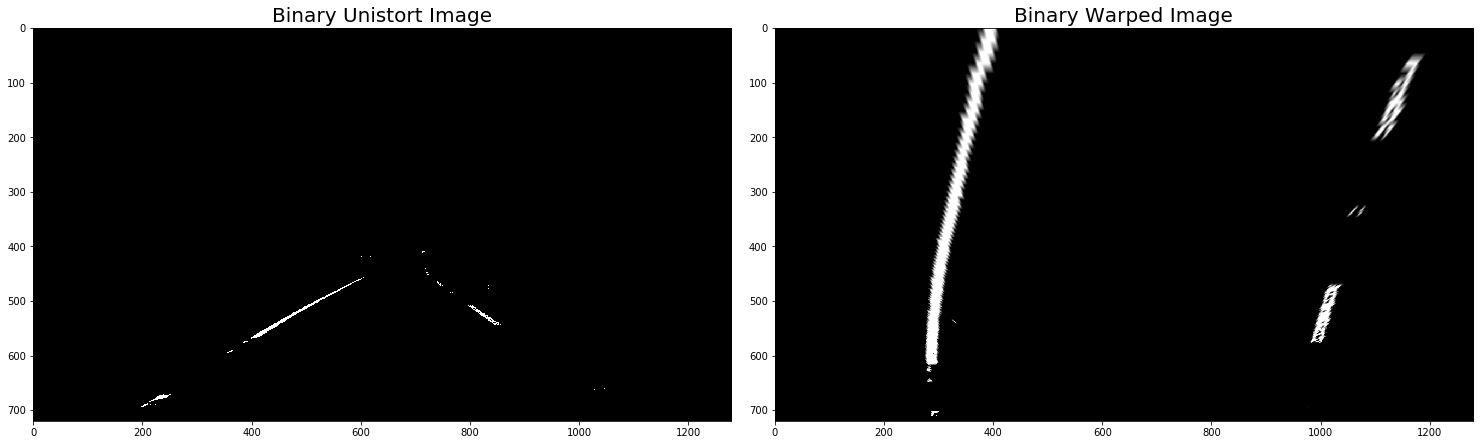

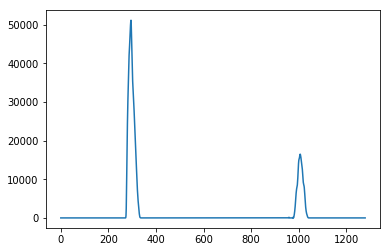

current pos: 295 1006
current pos: 288 1006
current pos: 286 993
current pos: 292 1007
current pos: 301 1024
current pos: 317 1065
current pos: 334 1065
current pos: 350 1116
current pos: 366 1142
fit:  [ 1.27928442e-04 -2.63736061e-01  3.95965390e+02] [ 1.82255342e-04 -4.55147049e-01  1.19475210e+03]
1285.895018356566 m 905.5901795383352 m 0.821181931924984 m


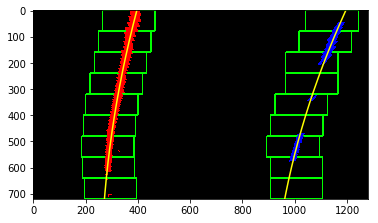

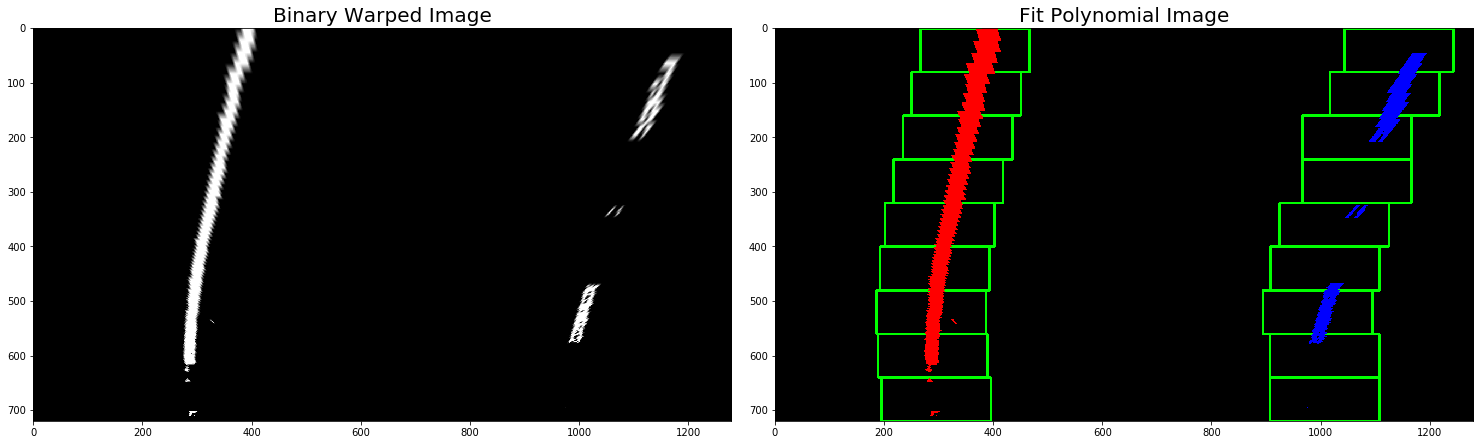

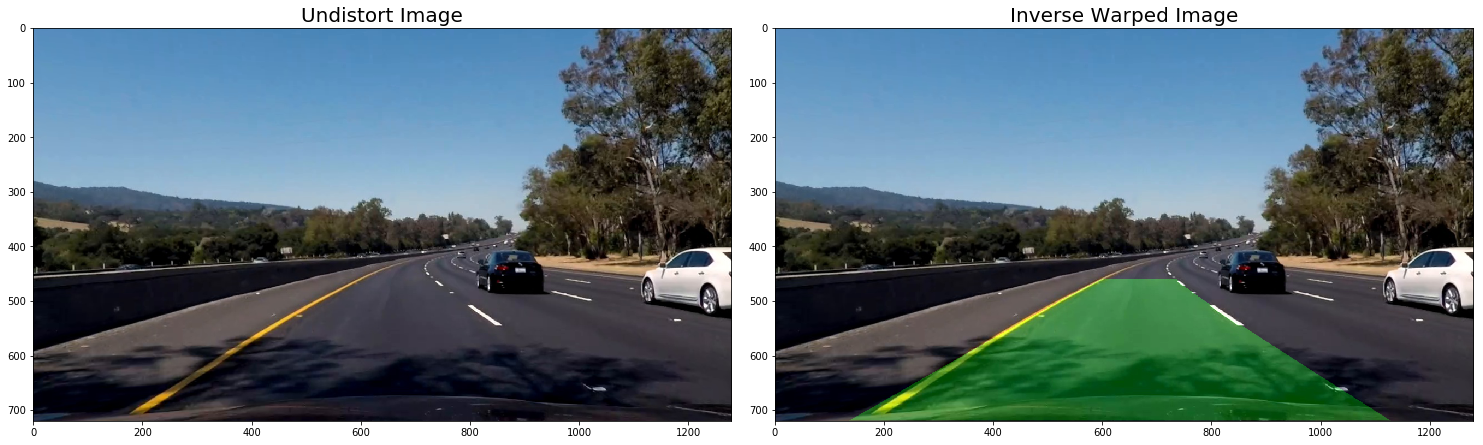

In [16]:
img = mpimg.imread('./test_images/search_around/test0001.jpg')
result = process_image(img,True)

In [17]:
# Note that in your project, you'll also want to feed in the previous fits
def search_around_poly(binary_warped,prev_left_fit,prev_right_fit,visual=False):
    # HYPERPARAMETER
    # Choose the width of the margin around thsearch_around_polye previous polynomial to search
    # The quiz grader expects 100 here, but feel free to tune on your own!
    margin = 100

    # Grab activated pixels
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    ### TO-DO: Set the area of search based on activated x-values ###
    ### within the +/- margin of our polynomial function ###
    ### Hint: consider the window areas for the similarly named variables ###
    ### in the previous quiz, but change the windows to our new search area ###
    left_lane_inds = ((nonzerox > (prev_left_fit[0]*(nonzeroy**2) + prev_left_fit[1]*nonzeroy + 
                    prev_left_fit[2] - margin)) & (nonzerox < (prev_left_fit[0]*(nonzeroy**2) + 
                    prev_left_fit[1]*nonzeroy + prev_left_fit[2] + margin)))
    right_lane_inds = ((nonzerox > (prev_right_fit[0]*(nonzeroy**2) + prev_right_fit[1]*nonzeroy + 
                    prev_right_fit[2] - margin)) & (nonzerox < (prev_right_fit[0]*(nonzeroy**2) + 
                    prev_right_fit[1]*nonzeroy + prev_right_fit[2] + margin)))
    
    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    # Fit new polynomials
    left_fitx, right_fitx, ploty, left_fit, right_fit = fit_poly(binary_warped.shape, leftx, lefty, rightx, righty)
    
    if visual == True:
        ## Visualization ##
        plt.figure()
        # Create an image to draw on and an image to show the selection window
        out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255   
        window_img = np.zeros_like(out_img)
        # Color in left and right line pixels
        out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
        out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

        # Generate a polygon to illustrate the search window area
        # And recast the x and y points into usable format for cv2.fillPoly()
        left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
        left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, 
                                  ploty])))])
        left_line_pts = np.hstack((left_line_window1, left_line_window2))
        right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
        right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, 
                                  ploty])))])
        right_line_pts = np.hstack((right_line_window1, right_line_window2))

        # Draw the lane onto the warped blank image
        cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
        cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
        result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)

        
        # Plot the previous polynomial lines onto the image
        prev_left_fitx = prev_left_fit[0]*(ploty**2) + prev_left_fit[1]*ploty + prev_left_fit[2]
        prev_right_fitx = prev_right_fit[0]*(ploty**2) + prev_right_fit[1]*ploty + prev_right_fit[2]            
        plt.plot(prev_left_fitx, ploty, color='purple')
        plt.plot(prev_right_fitx, ploty, color='purple')
        
        # Plot the new polynomial lines onto the image
        plt.plot(left_fitx, ploty, color='yellow')
        plt.plot(right_fitx, ploty, color='yellow')

        # View your output
        plt.imshow(result)
        ## End visualization steps ##
    else:
        result = None
    return left_fitx, right_fitx, ploty, left_fit, right_fit, leftx, lefty, rightx, righty, result     

In [18]:
def show_search_around_poly():  
    image = mpimg.imread('./test_images/search_around/test0002.jpg')
    
    mtx, dist = getDistort()
    src,dst,M,Minv = getPerspectiveTransform(image.shape[1::-1])
    
    undist,bin_img,binary_warped = warper(image,dist,mtx,src,dst,M,visual=True)
    
    prev_leftfit  = [ 1.37176790e-04, -2.70657239e-01, 3.96978300e+02]
    prev_rightfit = [ 1.73947370e-04, -4.50613946e-01, 1.19454514e+03]
    
    left_fitx, right_fitx, ploty, left_fit, right_fit, leftx, lefty, rightx, righty, out_img = search_around_poly(binary_warped,prev_leftfit,prev_rightfit,visual=True)
    print('search around polyfit: ',left_fit,right_fit)
    show_compare(binary_warped,out_img,title1='Binary Warped Image',title2='Search-around Polyfit Image')
    left_curverad, right_curverad,vehicle_pos = measure_curvature_real(binary_warped.shape,left_fitx,right_fitx,ploty)
    print(left_curverad, 'm', right_curverad, 'm', vehicle_pos, 'm')
    result = map_lane(undist,Minv,left_fitx,right_fitx,ploty,visual=True)

search around polyfit:  [ 9.78593782e-05 -2.29072517e-01  3.85464027e+02] [ 1.79924987e-04 -4.62217756e-01  1.20381612e+03]
1680.31716980273 m 917.462372192801 m 0.8173832514838713 m


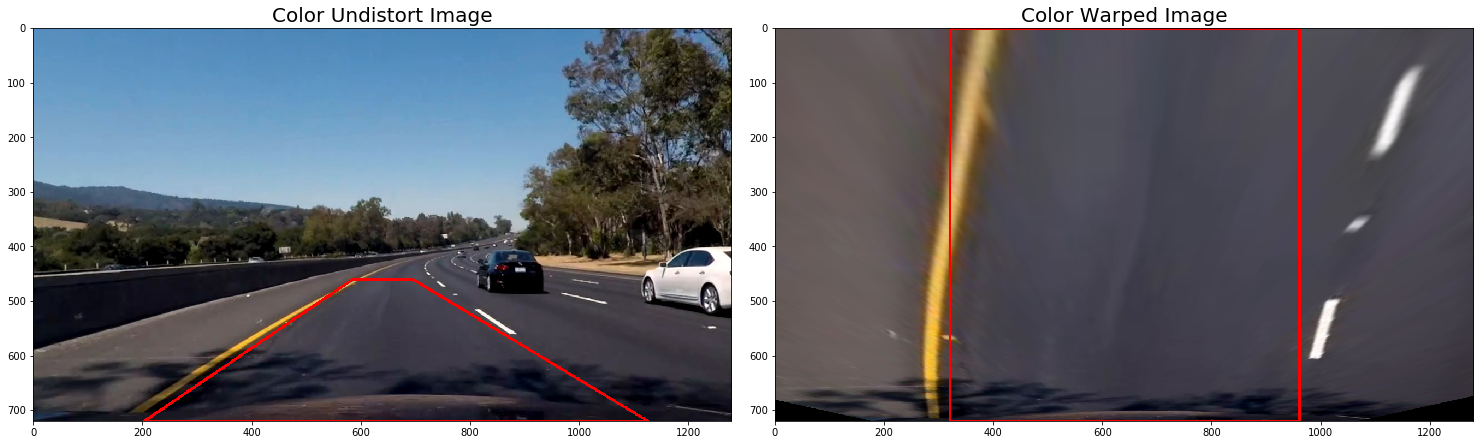

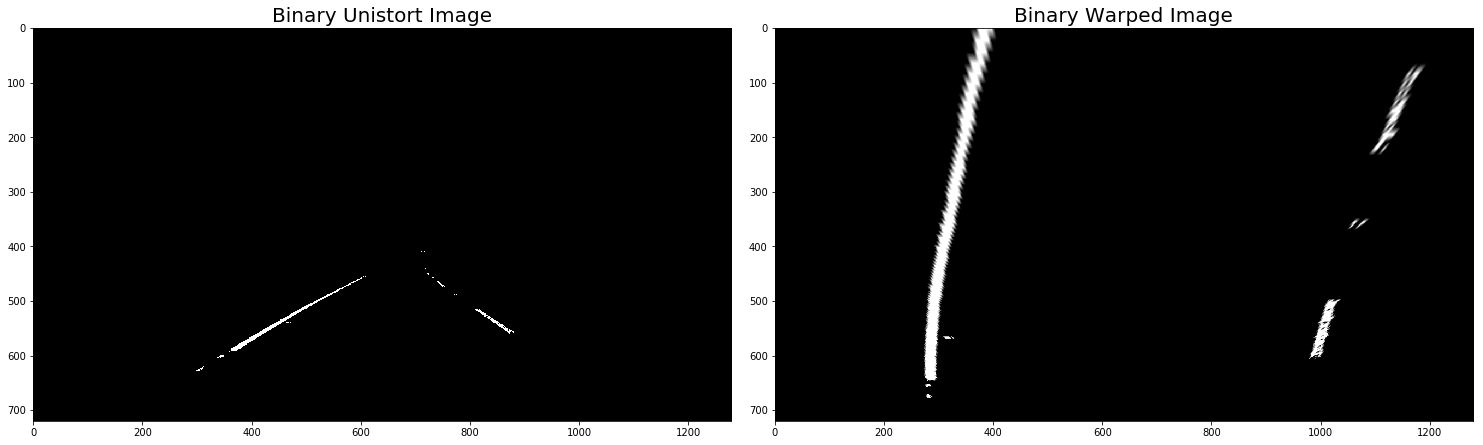

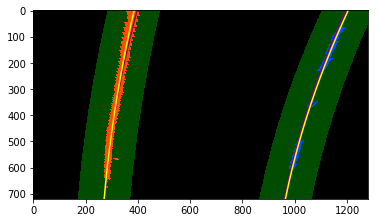

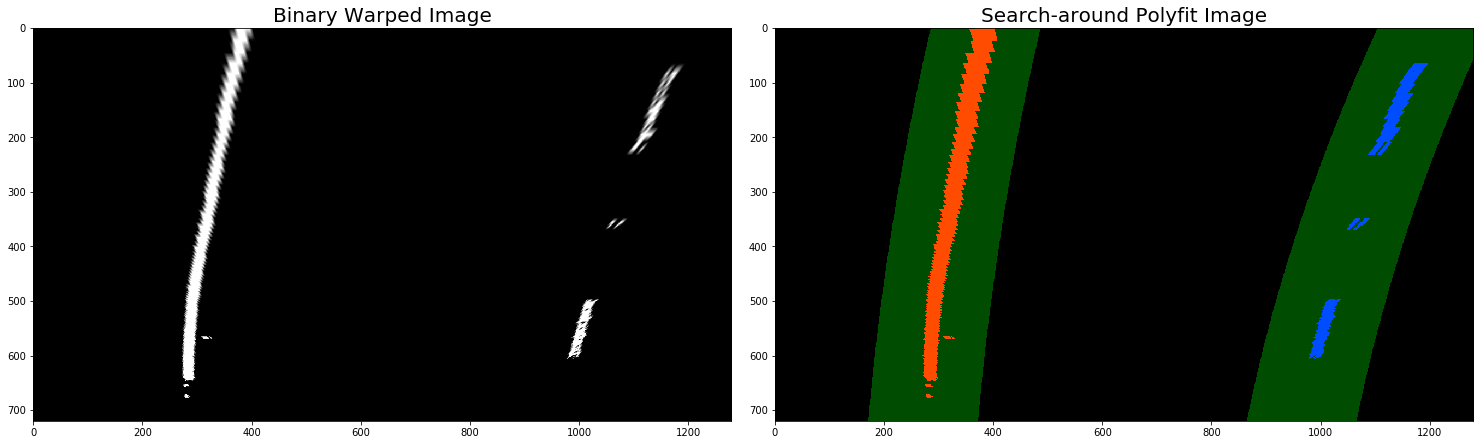

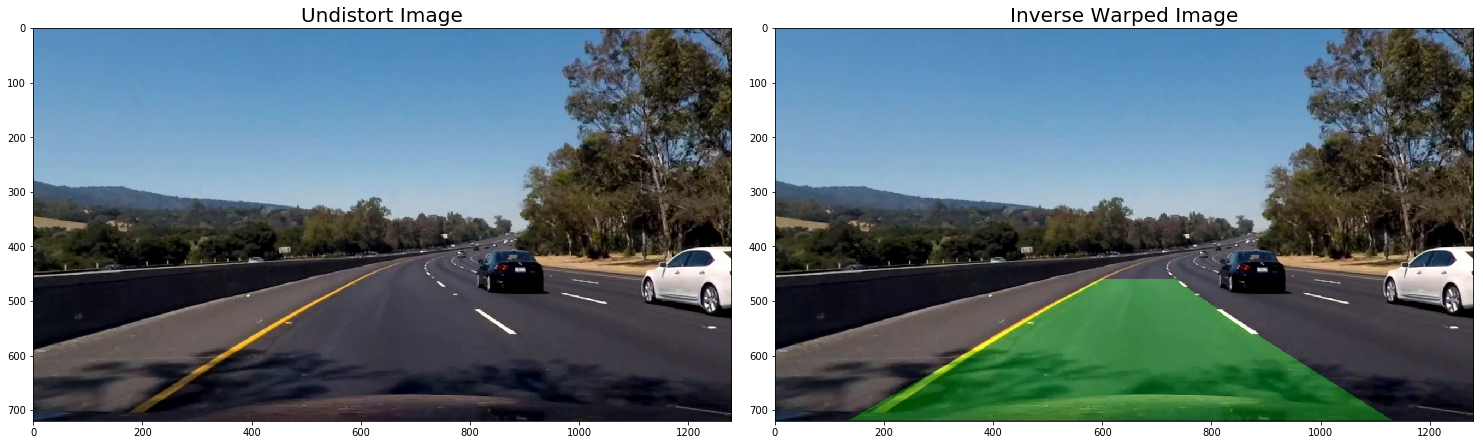

In [19]:
show_search_around_poly()

# Pipeline (video)

In [20]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# %matplotlib inline

In [21]:
# %load utils.py
%run utils.py

<Figure size 432x288 with 0 Axes>

In [22]:
# Define a class to receive the characteristics of each line detection
class Line():
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False  
        # x values of the last n fits of the line
        self.recent_xfitted = [] 
        #average x values of the fitted line over the last n iterations
        self.bestx = None     
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = None  
        #polynomial coefficients for the most recent fit
        self.current_fit = [np.array([False])]  
        #radius of curvature of the line in some units
        self.radius_of_curvature = None 
        #distance in meters of vehicle center from the line
        self.line_base_pos = None 
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        #x values for detected line pixels
        self.allx = None  
        #y values for detected line pixels
        self.ally = None  

In [23]:
def get_averaged_line(previous_lines, new_line):
    """
        This function computes an averaged lane line by averaging over previous good frames.
    """
    
    # Number of frames to average over
    num_frames = 3
    
    if new_line is None:
        # No line was detected
        
        if len(previous_lines) == 0:
            # If there are no previous lines, return None
            return previous_lines, None
        else:
            # Else return the last line
            return previous_lines, previous_lines[-1]
    else:
        if len(previous_lines) < num_frames:
            # we need at least num_frames frames to average over
            previous_lines.append(new_line)
            return previous_lines, new_line
        else:
            # average over the last num_frames frames
            previous_lines[0:num_frames-1] = previous_lines[1:]
            previous_lines[num_frames-1] = new_line
            new_line = np.zeros_like(new_line)
            for i in range(num_frames):
                new_line += previous_lines[i]
            new_line /= num_frames
            return previous_lines, new_line

In [24]:
# Run image through the pipeline
def pipleline_video(image):
    global left_line
    global right_line
    global frame
    
    fit_skip = False
    frame = frame+1
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image where lines are drawn on lanes)
    undist,bin_img,binary_warped = warper(image,dist,mtx,src,dst,M,visual=False)

    if left_line.detected == False or right_line.detected == False:
        left_fitx, right_fitx, ploty, left_fit, right_fit, leftx, lefty, rightx, righty, out_img = fit_polynomial(binary_warped)
    else:
        if np.mean(left_line.current_fit - right_line.current_fit)  == 0:
            print('left and right current_fit is equal ! Frame ',frame,': ',left_line.current_fit,right_line.current_fit)
        left_fitx, right_fitx, ploty, left_fit, right_fit, leftx, lefty, rightx, righty, out_img = search_around_poly(binary_warped,left_line.current_fit,right_line.current_fit,visual=False)
        fit_skip = True
        if (left_fitx is None or right_fitx is None):
            left_fitx, right_fitx, ploty, left_fit, right_fit, leftx, lefty, rightx, righty, out_img = fit_polynomial(binary_warped)
            fit_skip = False
            print('after search_around_poly fit_polynomial: ',frame)

    if left_fitx is not None and right_fitx is not None:

        left_curverad, right_curverad,vehicle_pos = measure_curvature_real(binary_warped.shape,left_fitx,right_fitx,ploty)

        # Sanity Check
        # Checking that they have similar curvature
        # Checking that they are roughly parallel
        # Checking that they are separated by approximately the right distance horizontally
        if np.abs(left_curverad - right_curverad) < 2000 and np.abs(left_fitx[-1] - right_fitx[-1]) < 900 and np.abs(left_fitx[0] - right_fitx[0]) > 300:
            left_line.detected = True
            right_line.detected = True
        else:
            if fit_skip == True:
                left_fitx, right_fitx, ploty, left_fit, right_fit, leftx, lefty, rightx, righty, out_img = search_around_poly(binary_warped,left_line.current_fit,right_line.current_fit,visual=False)
                if (left_fitx is None or right_fitx is None):
                    left_fitx, right_fitx, ploty, left_fit, right_fit, leftx, lefty, rightx, righty, out_img = fit_polynomial(binary_warped)
                    fit_skip = False
                    if np.abs(left_curverad - right_curverad) < 2000 and np.abs(left_fitx[-1] - right_fitx[-1]) < 900 and np.abs(left_fitx[0] - right_fitx[0]) > 300:
                        left_line.detected = True
                        right_line.detected = True
                    else:
                        left_line.detected = False
                        right_line.detected = False
                        print('Fit skip Sanity Check Fail ! Frame ',frame,': ',np.abs(left_curverad - right_curverad),np.abs(left_fitx[-1] - right_fitx[-1]),np.abs(left_fitx[0] - right_fitx[0]))
                        print('Fit skip Sanity Check Fail ! ',left_curverad, 'm', right_curverad, 'm', vehicle_pos, 'm')
                        print('Fit skip Sanity Check Fail ! ', 'left_fit', left_fit, 'right_fit', right_fit, 'm')                        
            else:
                left_line.detected = False
                right_line.detected = False
                print('Sanity Check Fail ! Frame ',frame,': ',np.abs(left_curverad - right_curverad),np.abs(left_fitx[-1] - right_fitx[-1]),np.abs(left_fitx[0] - right_fitx[0]))
                print('Sanity Check Fail ! ',left_curverad, 'm', right_curverad, 'm', vehicle_pos, 'm')
                print('Sanity Check Fail ! ', 'left_fit', left_fit, 'right_fit', right_fit, 'm')
    else:
        if left_fitx is None:
            left_line.detected = False
            print('left_fitx is None ! Frame: ',frame)             
        if right_fitx is None:
            right_line.detected = False
            print('right_fitx is None ! Frame: ',frame)

    if left_line.detected == True and right_line.detected == True:
        left_line.current_fit = np.copy(left_fit)
        left_line.radius_of_curvature = left_curverad
        left_line.recent_xfitted,left_fitx = get_averaged_line(left_line.recent_xfitted,left_fitx)
        
        right_line.current_fit = np.copy(right_fit)
        right_line.radius_of_curvature = right_curverad
        right_line.recent_xfitted,right_fitx = get_averaged_line(right_line.recent_xfitted,right_fitx)
    else:
        left_line.current_fit  = [np.array([False])]
        right_line.current_fit = [np.array([False])]
        if (len(left_line.recent_xfitted) > 0 and len(right_line.recent_xfitted) > 0):
            left_fitx = left_line.recent_xfitted[-1]
            right_fitx = right_line.recent_xfitted[-1]
            
    if left_fitx is not None and right_fitx is not None:
        
        if np.equal(left_fitx,right_fitx)[0] == True and np.equal(left_fitx,right_fitx)[-1] == True:
            print('left_fitx equal right_fitx！Frame: ',frame)
    
        # use average fit calculate curvature
        left_curverad, right_curverad,vehicle_pos = measure_curvature_real(binary_warped.shape,left_fitx,right_fitx,ploty)
        result = map_lane(undist,Minv,left_fitx,right_fitx,ploty)

        curvature_string = "Radius of curvature: L %.2f m, R %.2f m" % (left_curverad,right_curverad)
        offset_string = "Center offset: %.2f m" % vehicle_pos
    
        cv2.putText(result,curvature_string , (100, 90), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255,255,255), thickness=2)
        cv2.putText(result, offset_string, (100, 150), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255,255,255), thickness=2)
        return result
    else:
        return image

In [25]:

mtx, dist = getDistort()
img_size = (1280,720)
src,dst,M,Minv = getPerspectiveTransform(img_size)
left_line = Line()
right_line = Line()
frame = 0

In [26]:
test_output = 'test_videos_output/project_video.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)

# clip2 = VideoFileClip("project_video.mp4").subclip(40,43)
clip2 = VideoFileClip("project_video.mp4")

white_clip = clip2.fl_image(pipleline_video) #NOTE: this function expects color images!!
%time white_clip.write_videofile(test_output, audio=False)

[MoviePy] >>>> Building video test_videos_output/project_video.mp4
[MoviePy] Writing video test_videos_output/project_video.mp4


100%|█████████████████████████████████████▉| 1260/1261 [06:12<00:00,  3.32it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/project_video.mp4 

Wall time: 6min 14s


In [27]:
#关闭视频流
clip2.reader.close()
del clip2.reader

In [28]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(test_output))